<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df=pd.read_csv("fish_weight_predict.csv")

In [6]:
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [5]:
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

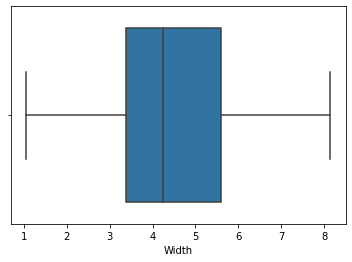

In [12]:
sns.boxplot(df['Width'])

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V_length'>

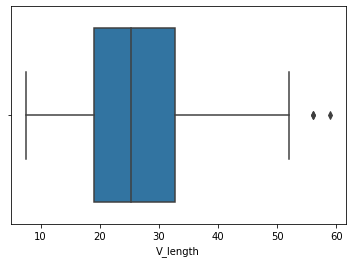

In [8]:
sns.boxplot(df['V_length'])

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='D_length'>

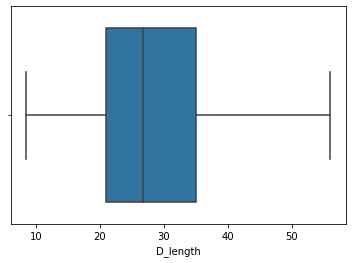

In [14]:
sns.boxplot(df['D_length'])

In [13]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

Species       1.00000
Weight      122.50000
V_length     19.05000
D_length     21.00000
C_length     23.15000
Height        5.94480
Width         3.38565
Name: 0.25, dtype: float64
Species       3.5000
Weight      650.0000
V_length     32.7000
D_length     35.5000
C_length     39.6500
Height       12.3659
Width         5.5845
Name: 0.75, dtype: float64
Species       2.50000
Weight      527.50000
V_length     13.65000
D_length     14.50000
C_length     16.50000
Height        6.42110
Width         2.19885
dtype: float64


(156, 7)

In [15]:
df.head()

,Species,Weight,V_length,D_length,C_length,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


<AxesSubplot:xlabel='C_length', ylabel='Count'>

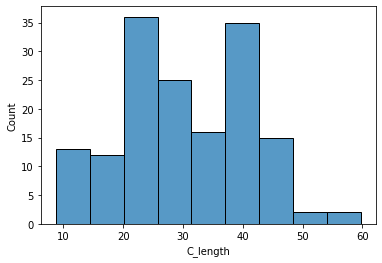

In [20]:
sns.histplot(df['C_length'])

Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 

In [24]:
from sklearn.metrics import r2_score

In [21]:
df.head()
x=df.drop('Weight',axis=1)
y=df['Weight']

In [22]:
X_scaler = StandardScaler()
X = X_scaler.fit_transform(x)
y = (y - y.mean()) / y.std()

In [23]:
# type your code here
linreg=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)
lr_model=linreg.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
mse_train = mean_squared_error(y_test, y_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

Root Mean Squared Error (RMSE) on training set:  0.3098


In [26]:
print('R-Square : ',r2_score(y_test, y_pred))

R-Square :  0.8878004610615267


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

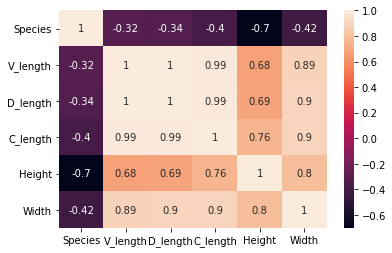

In [27]:
# type your code here
sns.heatmap(x.corr(),annot=True)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif["Features"] = df.columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF' to store the values 
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# print the VIF
print(vif)

   Features           VIF
0   Species      3.914335
1    Weight     11.687651
2  V_length  13702.609754
3  D_length  17046.572826
4  C_length   3681.001180
5    Height    106.247448
6     Width    117.133555


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
from sklearn.linear_model import Ridge

In [33]:
ridge=Ridge(alpha=1.5)

In [72]:
ridgeModel=ridge.fit(x_train,y_train)
ridgePredict=ridgeModel.predict(x_test)
mse_train = mean_squared_error(y_test, ridgePredict)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

Root Mean Squared Error (RMSE) on training set:  0.3567


In [34]:
ridgeModel=ridge.fit(x_train,y_train)
ridgePredict=ridgeModel.predict(x_test)
mse_train = mean_squared_error(y_test, ridgePredict)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

Root Mean Squared Error (RMSE) on training set:  0.3174


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
from sklearn.linear_model import SGDRegressor

In [36]:
sgd = SGDRegressor(random_state = 1)
linreg_with_SGD = sgd.fit(x_train, y_train)
sgd_pred = linreg_with_SGD.predict(x_test)
mse_train = mean_squared_error(y_test, sgd_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

Root Mean Squared Error (RMSE) on training set:  0.3597


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
from sklearn.linear_model import Lasso

In [73]:
lasso = Lasso(alpha = 1)
lasso_model = lasso.fit(x_train, y_train)
lasso_model.predict(x_test)

array([0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671, 0.01796671, 0.01796671, 0.01796671,
       0.01796671, 0.01796671])

In [75]:
lasso_model.coef_

array([-0.,  0.,  0.,  0.,  0.,  0.])

In [80]:
# type your code here
df_lasso_coeff = pd.DataFrame(data = {'Variable': df.columns, 'Coefficient': lasso_model.coef_})
print('Least significant variables obtained from Lasso Regression when alpha is 1:',
      df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# type your code here
tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)
ridge_grid.fit(x_train, y_train)
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 9}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [63]:
# type your code here
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.1, 1]} ]
enet = ElasticNet()

# using GridSearchCV to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(x_train, y_train)
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 0.0001} 



C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2540523838073487, tolerance: 0.010396738295126585
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8491591547378494, tolerance: 0.010360528512818979
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.347877538823712, tolerance: 0.009603971961705638
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [41]:
from sklearn.linear_model import ElasticNet

In [45]:
# type your code here
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.1, 1, 2, 3],'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]} ]
 
# instantiate the ElasticNet() method
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2540523838073487, tolerance: 0.010396738295126585
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8491591547378494, tolerance: 0.010360528512818979
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.347877538823712, tolerance: 0.009603971961705638
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.772397995523175, tolerance: 0.009606574666043057
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0055068138478553, tolerance: 0.01096410879783395
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.773397451375175, tolerance: 0.010465758443696922
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4345718997536934, tolerance: 0.009606574666043057
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7648542835473515, tolerance: 0.01096410879783395
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.517396084341914, tolerance: 0.010465758443696922
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_des

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15702164293490828, tolerance: 0.010497187103912325
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2634995578750736, tolerance: 0.010396738295126585
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19263016924869625, tolerance: 0.010360528512818979
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04887294128823605, tolerance: 0.009603971961705638
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2555383786715568, tolerance: 0.0106407376552065
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06122585006035752, tolerance: 0.009710218819712247
  model = cd_fast.enet_coordinate_descent(
C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_d

Best parameters for ELastic-net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.9} 



C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8702818843991205, tolerance: 0.011469054174405616
  model = cd_fast.enet_coordinate_descent(


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# type your code here
tuned_paramaters = [{'alpha':[0.1],'l1_ratio':[0.9]} ]
enet = ElasticNet(alpha=0.1,l1_ratio=0.9)

enet.fit(x_train, y_train)
y_pred=enet.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
rmse_test = round(np.sqrt(mse), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on test set:  0.3359
